In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc
mc = simr.ms.mc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
mc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
MC: Hi!  You're in masked_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


In [2]:
tDir = '../targetDir1'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'r00000' Good!


{'zoo_0': {'cmpArg': {'function_name': 'correlation',
                      'targetName': 'zoo_0',
                      'targetType': 'target_image',
                      'type': 'direct_image_comparison'},
           'comment': 'Starting score '
                      'parameters for '
                      '587722984435351614',
           'imgArg': {'comment': 'Starting '
                                 'image '
                                 'parameter '
                                 'for '
                                 '587722984435351614',
                      'galaxy_centers': {'px': 513,
                                         'py': 514,
                                         'sx': 309,
                                         'sy': 608},
                      'image_size': {'height': 1024,
                                     'width': 1024},
                      'name': 'zoo_0'},
           'name': 'zoo_0',
           'scoreType': 'model_fitness_score',
         

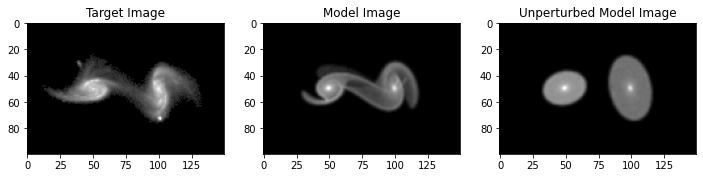

In [3]:
tParams = tInfo.getImageParams()
gm.pprint(tParams)

tImg = tInfo.getTargetImage('zoo_2')
mImg = rInfo.getModelImage('zoo_2')
iImg = rInfo.getModelImage('zoo_2',initImg=True)

fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].set_title("Target Image")
ax[0].imshow( tImg, cmap='gray' )

ax[1].set_title("Model Image")
ax[1].imshow(mImg,cmap='gray')

ax[2].set_title("Unperturbed Model Image")
ax[2].imshow(iImg,cmap='gray')

In [4]:

def plotMasks( tImg, mImg, iImg, otImg, omImg, oiImg, mtImg, mmImg, miImg ):
    
    fig, ax = plt.subplots(3,3,figsize=(16,12))
    ax[0,0].set_title("Target Image")
    ax[0,0].imshow( tImg, cmap='gray' )
    ax[0,1].set_title("Model Image")
    ax[0,1].imshow( mImg, cmap='gray')
    ax[0,2].set_title("Unperturbed Model Image")
    ax[0,2].imshow( iImg, cmap='gray')
    
    ax[1,0].set_title("Mask Overlap Target Image")
    ax[1,0].imshow( otImg, cmap='gray' )
    ax[1,1].set_title("Mask Overlap Model Image")
    ax[1,1].imshow( omImg, cmap='gray')
    ax[1,2].set_title("Mask Overlap Unperturbed Model Image")
    ax[1,2].imshow( oiImg, cmap='gray')
    
    ax[2,0].set_title("Masked Target Image")
    ax[2,0].imshow( mtImg, cmap='gray', vmin=0, vmax=1.0 )
    ax[2,1].set_title("Masked Model Image")
    ax[2,1].imshow( mmImg, cmap='gray', vmin=0, vmax=1.0)
    ax[2,2].set_title("Masked Unperturbed Model Image")
    ax[2,2].imshow( miImg, cmap='gray', vmin=0, vmax=1.0)

1.0
1.0
Should Match
(627,)
(627,)
(627,)


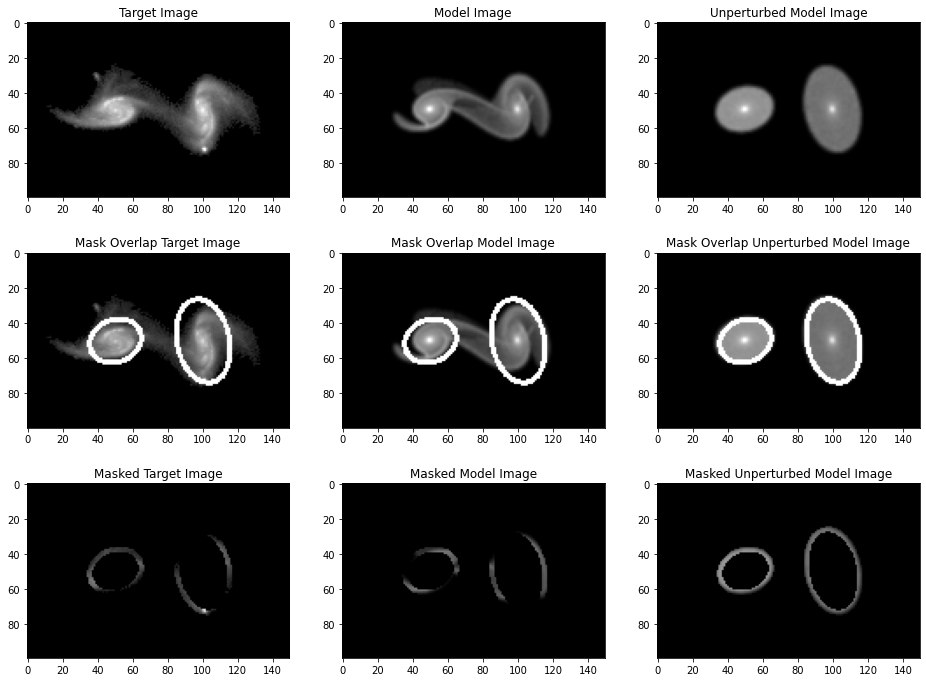

In [5]:
px = tParams['zoo_2']['imgArg']['galaxy_centers']['px']
py = tParams['zoo_2']['imgArg']['galaxy_centers']['py']
sx = tParams['zoo_2']['imgArg']['galaxy_centers']['sx']
sy = tParams['zoo_2']['imgArg']['galaxy_centers']['sy']

centers = [ (px,py), (sx,sy) ]
color = ( 1.0)
thickness = [ 2, 2 ]
axesLength = [ (15, 12), (24,15) ]
angles = [ -20, -102 ]

mask = np.zeros_like(tImg)
for i in range(2):
    mask = mc.createEllipse( mask, centers[i], color=color, thickness=thickness[i], angle = angles[i], axesLength = axesLength[i] )
    print(np.amax(mask))

#plt.imshow(mask)

otImg = mc.addBinaryMask( tImg, mask )
omImg = mc.addBinaryMask( mImg, mask )
oiImg = mc.addBinaryMask( iImg, mask )

mtImg = mc.applyBinaryMask( tImg, mask )
mmImg = mc.applyBinaryMask( mImg, mask )
miImg = mc.applyBinaryMask( iImg, mask )

plotMasks( tImg, mImg, iImg, otImg, omImg, oiImg, mtImg, mmImg, miImg )


Should Match
(627,)
(627,)
(627,)


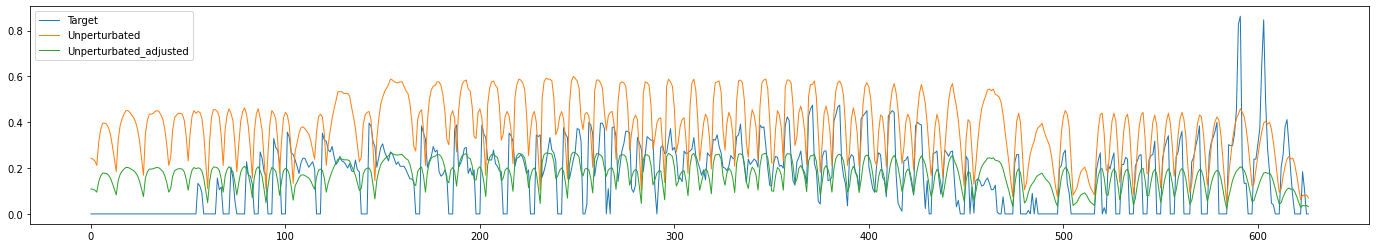

In [43]:
etImg = mc.extractBinaryMask( tImg, mask )
emImg = mc.extractBinaryMask( mImg, mask )
eiImg = mc.extractBinaryMask( iImg, mask )

emImg2 = dc.matchTotalBrightness( emImg, etImg,  )
eiImg2 = dc.matchTotalBrightness( eiImg, etImg,  )

print("Should Match")
print(etImg.shape)
print(emImg.shape)
print(eiImg.shape)

plt.figure(figsize=(24,4))
plt.plot(etImg,label='Target',linewidth=1)
#plt.plot(emImg,label='Model',linewidth=1)
plt.plot(eiImg,label='Unperturbated',linewidth=1)
#plt.plot(emImg2,label='Model_Adjusted',linewidth=1)
plt.plot(eiImg2,label='Unperturbated_adjusted',linewidth=1)
plt.legend()

In [ ]:
scores = tInfo.getScores(reload=True)

fig, ax = plt.subplots(6,4,figsize=(30,42))

for i in range(6):
    print( '%d - cmpFunc: %s' % (i, mask_params['mask_testing_%d_control_group'%i]['cmpArg']['function_name']) )
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_control_group'%i, fig=fig, ax=ax[i,0])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_control_adjust'%i, fig=fig, ax=ax[i,1])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_masked'%i, fig=fig, ax=ax[i,2])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_masked_adjust'%i, fig=fig, ax=ax[i,3])

In [33]:

mask_params = {}
mask_name = 'mask_binary_0'
mask_params[mask_name] = deepcopy( tParams['zoo_2'] )
mask_params[mask_name]['name'] = mask_name
mask_params[mask_name]['cmpArg']['type'] = 'mask_binary_simple_compare'
mask_params[mask_name]['cmpArg']['mask'] = {}
mask_params[mask_name]['cmpArg']['mask']['name'] = mask_name
mask_params[mask_name]['cmpArg']['mask']['type'] = 'target'
mask_params[mask_name]['cmpArg']['brightness_match'] = 'match_average'

#gm.pprint(mask_params)

newScoreArgs = gm.inArgClass()
newScoreArgs.setArg( 'scoreParams', mask_params )
newScoreArgs.setArg( 'printAll', True )
newScoreArgs.setArg( 'newScore', True )
newScoreArgs.setArg( 'overWrite', True )

simr.simr_run( rInfo=rInfo, arg = newScoreArgs)
#rInfo.printScores()

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd5bf824ac0>
MS: Run:
MS: scoreName: mask_binary_0
MS: mask_compare_setup: mask_binary_0
	 -  paramName: mask_binary_0
	 -  modelName: zoo_2
	 - targetName: zoo_2
	 -   maskName: mask_binary_0
	 - Read target image
	 - Read model image
	 - Read target mask
MS: mask_compare_setup: New Score!: mask_binary_0 - 0.376678 - 0.376678


In [34]:
mask_params = {}
mask_name = 'mask_binary_blank'
mask_params[mask_name] = deepcopy( tParams['zoo_2'] )
mask_params[mask_name]['cmpArg']['type'] = 'mask_binary_simple_compare'
mask_params[mask_name]['cmpArg']['mask'] = {}
mask_params[mask_name]['cmpArg']['mask']['name'] = 'mask_binary_0'
mask_params[mask_name]['cmpArg']['mask']['type'] = 'target'

i = 0

for name, func in dc.scoreFunctions:
    
    print(name)
    
    mask_name1 = 'mask_testing_%s_%s' % ( i, 'control_group' )
    mask_params[mask_name1] = deepcopy( tParams['zoo_2'] )
    mask_params[mask_name1]['name'] = mask_name1
    mask_params[mask_name1]['cmpArg']['function_name'] = name
    
    mask_name2 = 'mask_testing_%s_%s' % ( i, 'control_adjust' )
    mask_params[mask_name2] = deepcopy( tParams['zoo_2'] )
    mask_params[mask_name2]['name'] = mask_name2
    mask_params[mask_name2]['cmpArg']['function_name'] = name
    mask_params[mask_name2]['cmpArg']['brightness_match'] = 'match_total'
    
    mask_name3 = 'mask_testing_%s_%s' % ( i, 'masked' )
    mask_params[mask_name3] = deepcopy( mask_params['mask_binary_blank'] )
    mask_params[mask_name3]['name'] = mask_name3
    mask_params[mask_name3]['cmpArg']['function_name'] = name     

    mask_name4 = 'mask_testing_%s_%s' % ( i, 'masked_adjust' )
    mask_params[mask_name4] = deepcopy( mask_params['mask_binary_blank'] )
    mask_params[mask_name4]['name'] = mask_name4
    mask_params[mask_name4]['cmpArg']['function_name'] = name
    mask_params[mask_name4]['cmpArg']['brightness_match'] = 'match_total'  
    
    i+= 1
    
#gm.pprint(mask_params)

score_absolute_difference
score_absolute_difference_squared
score_binary_correlation
score_correlation
score_overlap_fraction
score_ssim
score_test_compare


In [35]:
print(tInfo.scoreParamDir)
print(gm.validPath( tInfo.scoreParamDir) )

from os import listdir

listdir( tInfo.scoreParamDir )
tInfo.saveScoreParam( mask_params, 'binary_mask_testing_1' )
listdir( tInfo.scoreParamDir )

/home/mbo2d/587722984435351614/information/score_parameters/
/home/mbo2d/587722984435351614/information/score_parameters/


['binary_mask_testing.json', 'binary_mask_testing_1.json']

In [36]:

newScoreArgs = gm.inArgClass()
newScoreArgs.setArg( 'scoreParams', mask_params )
newScoreArgs.setArg( 'printAll', False )
newScoreArgs.setArg( 'newImage', False )
newScoreArgs.setArg( 'newScore', True )
newScoreArgs.setArg( 'overWrite', True )

simr.simr_run( rInfo=rInfo, arg = newScoreArgs)
rInfo.printScores()

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd5bf824ac0>
MS: Run:
IM: run_info_class.printScores()
	 - run_id: r00000
	 - zoo_merger: 0.945946
	 - machine_scores: 83
	 - zoo_test: 0.843128
	 - zoo_0: 0.753202
	 - zoo_test_3: 0.828484
	 - new_score: 0.941951
	 - zoo_2: 0.376678
	 - mask_binary_0: 0.376678
	 - mask_testing_0_0: 0.972033
	 - mask_testing_0_1: 0.969733
	 - mask_testing_0_2: 0.969733
	 - mask_testing_1_0: 0.994117
	 - mask_testing_1_1: 0.993195
	 - mask_testing_1_2: 0.993195
	 - mask_testing_2_0: 0.649091
	 - mask_testing_2_1: 0.653715
	 - mask_testing_2_2: 0.653715
	 - mask_testing_3_0: 0.846133
	 - mask_testing_3_1: 0.846133
	 - mask_testing_3_2: 0.846133
	 - mask_testing_4_0: 0.520040
	 - mask_testing_4_1: 0.524402
	 - mask_testing_4_2: 0.524402
	 - mask_testing_5_0: 0.807278
	 - mask_testing_5_1: 0.801603
	 - mask_testing_5_2: 0.8

0 - cmpFunc: score_absolute_difference
1 - cmpFunc: score_absolute_difference_squared
2 - cmpFunc: score_binary_correlation
3 - cmpFunc: score_correlation
4 - cmpFunc: score_overlap_fraction
5 - cmpFunc: score_ssim


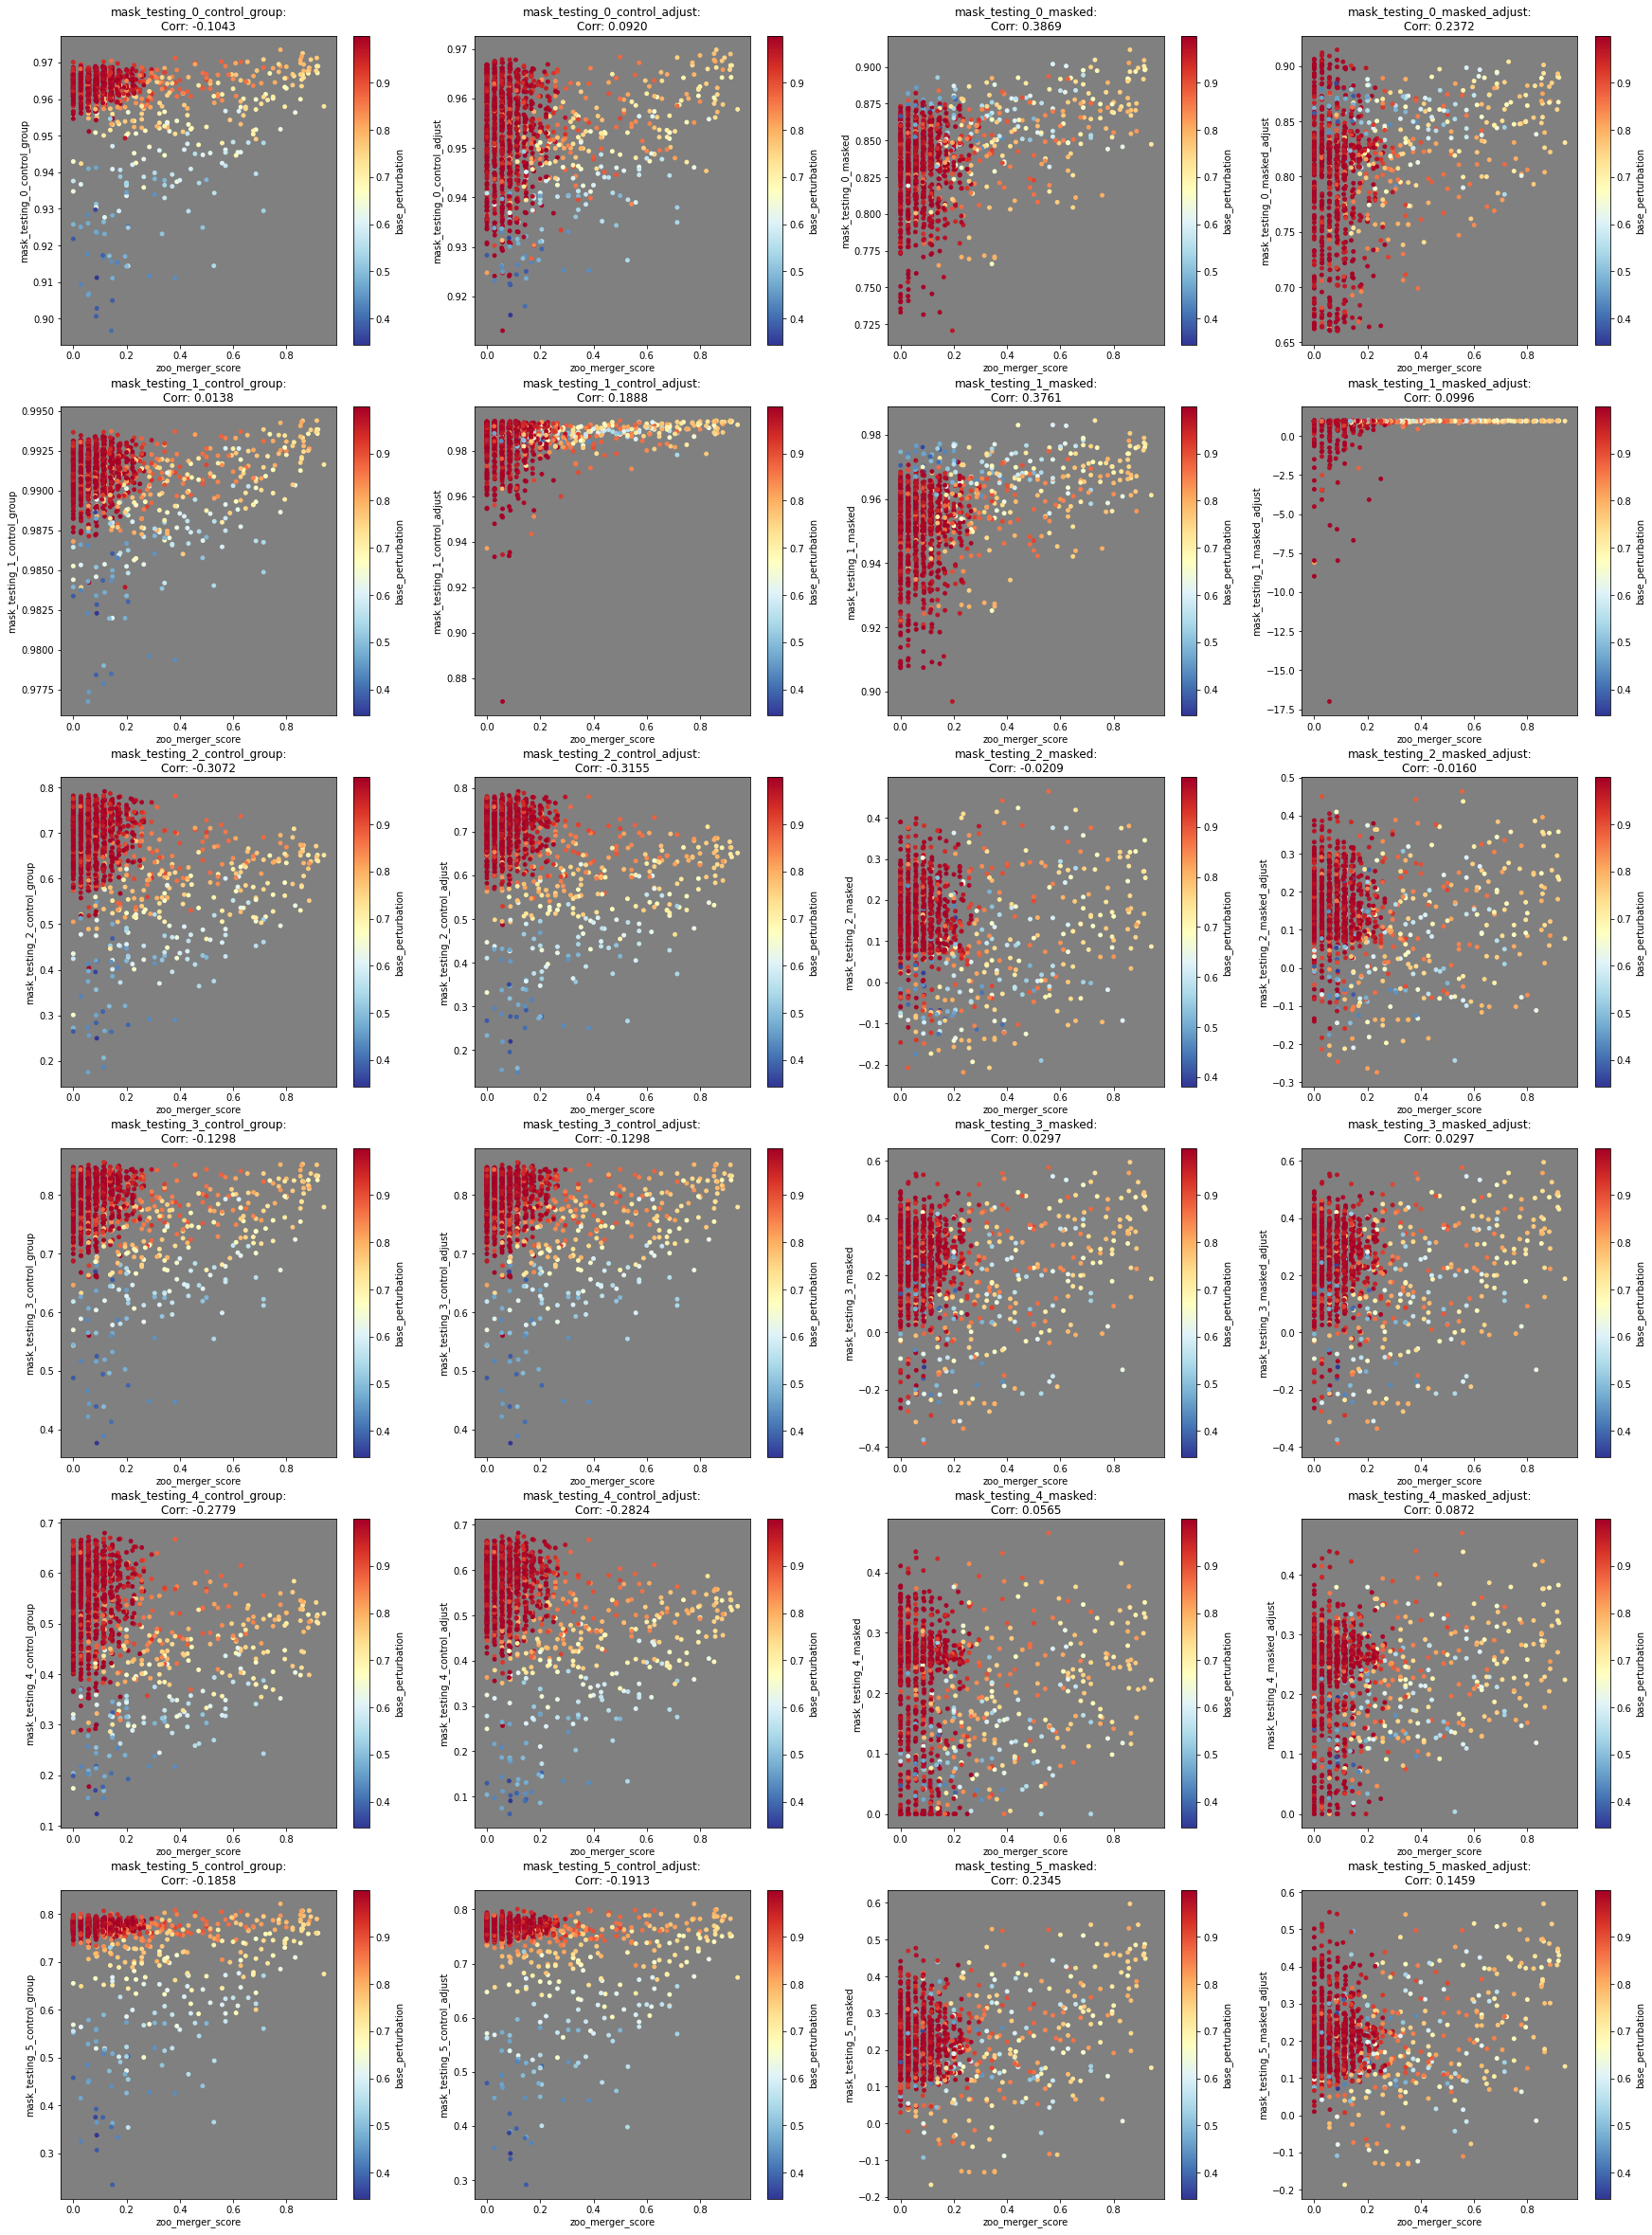

In [38]:
scores = tInfo.getScores(reload=True)

fig, ax = plt.subplots(6,4,figsize=(30,42))

for i in range(6):
    print( '%d - cmpFunc: %s' % (i, mask_params['mask_testing_%d_control_group'%i]['cmpArg']['function_name']) )
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_control_group'%i, fig=fig, ax=ax[i,0])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_control_adjust'%i, fig=fig, ax=ax[i,1])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_masked'%i, fig=fig, ax=ax[i,2])
    sa.getNamedPlot( scores=scores, sName='mask_testing_%d_masked_adjust'%i, fig=fig, ax=ax[i,3])